In [21]:
import torch as t
from torch.autograd import Variable as V
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [22]:
t.manual_seed(1000)
def get_fake_data(batch_size=8):
    x = t.rand(batch_size, 8)*20
    y = x*2 + (1 + t.randn(batch_size,1))*3
    return x, y

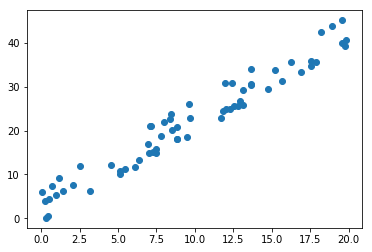

In [23]:
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

In [6]:
w = t.rand(1,1)
b = t.zeros(1,1)

In [7]:
lr  = 0.001

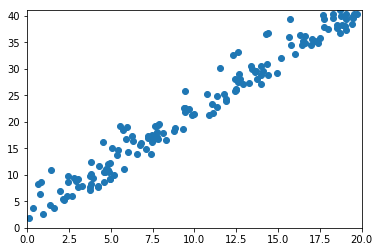

tensor([[nan]]) tensor([[nan]])


In [20]:
for ii in range (100):
    x, y = get_fake_data()
    y_pred = x*w + b.expand_as(y)
    loss = 0.5*(y_pred - y)**2
    loss = loss.sum()
    
    dloss = 1
    dy_pred = dloss*(y_pred - y)
    
    dw = x.t().mm(dy_pred).sum()
    db = dy_pred.sum()
    
    w.sub_(lr*dw)
    b.sub_(lr*db)
    
    if ii%100==0:
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1,1)
        y = x.float()*w.float() + b.expand_as(x).float()
        plt.plot(x.numpy(), y.numpy())
        
        x2, y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        print(w, b)

variable linear regression

In [24]:
w = V(t.rand(1,1), requires_grad=True)
b = V(t.zeros(1,1),requires_grad=True)
lr = 0.001

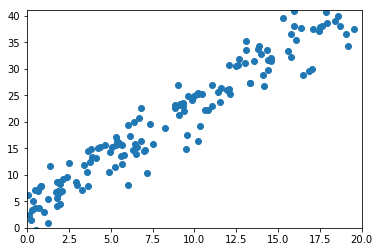

tensor([[nan]]) tensor([[nan]])


In [32]:
for ii in range(1000):
    x,y = get_fake_data()
    x,y = V(x), V(y)
    y_pred = x*w + b.expand_as(y)
    loss = 0.5 * (y_pred - y)**2
    loss = loss.sum()
    
    loss.backward()
    
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii%200 == 0:
        display.clear_output(wait=True)
        x = t.arange(0,20).view(-1,1)
        y = x.float().mm(w.data).float() + b.data.expand_as(x).float()
        plt.plot(x.numpy(), y.numpy())
        
        x2, y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
print(w.data, b.data)